# Analysis of tweets

For this analysis we collected tweets containing the set of public health keywords using the free Twitter Search API, which returns a random portion of matching tweets from the past seven days. This notebook does not include the collection process, but the analysis of the collected tweets.

### Select language using one of the following codes:
- en (English, default option)
- de (German)
- es (Spanish)
- fr (French)
- pt (Portuguese)


In [1]:
language = 'en'

In [2]:
language_ref = { 'en' : { 'name' : 'English', 'min_coocurrence' : 10, 'min_coocurrence_hashtags' : 2},
                 'de' : { 'name' : 'German', 'min_coocurrence' : 1, 'min_coocurrence_hashtags' : 1},
                 'es' : { 'name' : 'Spanish', 'min_coocurrence' : 1, 'min_coocurrence_hashtags' : 1},
                 'fr' : { 'name' : 'French', 'min_coocurrence' : 1, 'min_coocurrence_hashtags' : 1},
                 'pt' : { 'name' : 'Portuguese', 'min_coocurrence' : 1, 'min_coocurrence_hashtags' : 1},
               }

## Loading tweets

In [3]:
import os

tweets_folder = os.path.join("..", "data", "tweets", language)
tweets_climate_filename_prefix = "tweets_climate." + language + "."
tweets_health_filename_prefix = "tweets_health." + language + "."

tweets_climate = {}
tweets_health = {}

In [4]:
import pandas as pd
import csv
    
def load_tweets(filename):
    tweets = {}
    with open(filename) as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            tweets[row['id']] = row
    return tweets

In [5]:
import time
from ast import literal_eval
from textblob import TextBlob

def get_location(tweet):
    try:
        user = eval(str(tweet['user']))
        location = user['location']
    except:
        location = 'not_specified'
    if location == '':
        location = 'not_specified'
    return location

def get_date(tweet):
    timestamp = tweet['created_at']
    try:
        parsed_timestamp = time.strptime(timestamp, '%a %b %d %H:%M:%S %z %Y')
        month_year = "%s %s" % (parsed_timestamp.tm_mon, parsed_timestamp.tm_year)
    except:
        month_year = 'missing'
    return month_year

def get_text(tweet):
    text = str(tweet['text'])
    return text

def get_user(tweet):
    try:
        user = eval(str(tweet['user']))
        username = user['screen_name']
    except:
        username = 'not_specified'
    return "@" + username

def get_hashtags(tweet):
    hashtags = []
    try:
        hashtags_entities = eval(str(tweet['entities']))['hashtags']
        for hashtag_entity in hashtags_entities:
            hashtags.append("#" + hashtag_entity['text'])
    except:
        pass
    return hashtags

def get_user_mentions(tweet):
    user_mentions = []
    try:
        user_mentions_entities = eval(str(tweet['entities']))['user_mentions']
        for user_mention_entity in user_mentions_entities:
            user_mentions.append("@" + user_mention_entity['screen_name'])
    except:
        pass
    return user_mentions

def get_sentiment(tweet_text):
    if language == 'en':
        sentiment = TextBlob(tweet_text).sentiment
        if sentiment.polarity >= 0.1:
            polarity = 'positive'
        else:
            if sentiment.polarity < 0.1 and sentiment.polarity > -0.1:
                polarity = 'neutral'
            else:
                polarity = 'negative'
        if sentiment.subjectivity >= 0.5:
            subjectivity = 'subjective'
        else:
            subjectivity = 'objective'
    else:
        polarity = 'no_polarity'
        subjectivity = 'no_subjectivity'
    
    return (polarity, subjectivity)

def process_tweet(tweet):
    date = get_date(tweet)
    location = get_location(tweet)
    user = get_user(tweet)
    text = get_text(tweet)
    sentiment = get_sentiment(text)
    hashtags = get_hashtags(tweet)
    user_mentions = get_user_mentions(tweet)
    return {'date' : date, 'location' : location, 'text' : text, 'hashtags' : hashtags, 'user' : user, 'sentiment' : sentiment, 'user_mentions' : user_mentions}

In [6]:
from os import listdir

files = listdir(tweets_folder)
for f in files:
    if tweets_health_filename_prefix in f:
        print("Loading %s" % f)
        for (tweet_id, tweet) in load_tweets(os.path.join(tweets_folder, f)).items():
            tweets_health[tweet_id] = process_tweet(tweet)
#    if tweets_climate_filename_prefix in f:
#        print("Loading %s" % f)
#        for (tweet_id, tweet) in load_tweets(os.path.join(tweets_folder, f)).items():
#            tweets_climate[tweet_id] = process_tweet(tweet)

Loading tweets_health.en.2018-06-01 15:41:50.csv
Loading tweets_health.en.2018-06-09 00:02:07.csv
Loading tweets_health.en.2018-06-10 15:08:50.csv
Loading tweets_health.en.2018-06-09 04:01:56.csv
Loading tweets_health.en.2018-06-08 18:01:13.csv
Loading tweets_health.en.2018-06-01 18:41:19.csv
Loading tweets_health.en.2018-06-01 21:13:36.csv
Loading tweets_health.en.2018-06-08 21:05:10.csv
Loading tweets_health.en.2018-06-04 16:12:28.csv
Loading tweets_health.en.2018-06-11 08:00:05.csv
Loading tweets_health.en.2018-06-04 12:59:37.csv
Loading tweets_health.en.2018-05-31 12:29:10.csv
Loading tweets_health.en.2018-06-10 17:07:17.csv
Loading tweets_health.en.2018-06-10 12:48:23.csv
Loading tweets_health.en.2018-06-04 09:44:55.csv
Loading tweets_health.en.2018-06-01 23:55:09.csv
Loading tweets_health.en.2018-06-11 00:54:14.csv
Loading tweets_health.en.2018-06-08 22:31:19.csv
Loading tweets_health.en.2018-06-08 19:38:20.csv
Loading tweets_health.en.2018-06-01 04:20:26.csv
Loading tweets_healt

In [7]:
print("Climate tweets: %d - Health tweets: %d" % (len(tweets_climate), len(tweets_health)))

Climate tweets: 0 - Health tweets: 1898675


In [8]:
df_tweets_climate = pd.DataFrame.from_dict(tweets_climate, orient='index')
df_tweets_climate.head(10)

Empty DataFrame
Columns: []
Index: []

In [9]:
df_tweets_health = pd.DataFrame.from_dict(tweets_health, orient='index')
df_tweets_health.head(10)

date                   location  \
1002121839508893697  5 2018              United States   
1002121839668215810  5 2018        👩🏻‍🎓Syd 🛬 Jhb 👷🏻‍♀️   
1002121840217677826  5 2018    Sydney, New South Wales   
1002121841014722560  5 2018              not_specified   
1002121841035567104  5 2018  She/Her, Queer, Feminist.   
1002121841111056386  5 2018            London, England   
1002121842071654400  5 2018                  Cape Town   
1002121842964873216  5 2018              not_specified   
1002121843132813312  5 2018                        BTS   
1002121843384487936  5 2018  7430 Ikast Denmark Europe   

                                                                  text  \
1002121839508893697  @hibiki0221 Lin chi ling your interviews are f...   
1002121839668215810  RT @RiceBowlMY: It's time to leave your job if...   
1002121840217677826  RT @CharlesSturtUni: The money raised by #Team...   
1002121841014722560  RT @timkaine: Big Democratic turnout in 2017 =...   
1002121841035567104  RT @rgay: @jimmykimmel What she said is indefe...   
1002121841111056386  https://t.co/cVjb1mJsEE David Beckham doesn’t ...   
1002121842071654400  RT @PHMSA1: The People's National Health Insur...   
1002121842964873216  Cyclospora Diagnostic Testing Market To Witnes...   
1002121843132813312  RT @kjhorbit: shinee saying they are attending...   
1002121843384487936  RT @rdutel: "How heavy use of social media is ...   

                       hashtags              user               sentiment  \
1002121839508893697          []  @traveling_adult  (negative, subjective)   
1002121839668215810          []         @inawlala    (neutral, objective)   
1002121840217677826  [#TeamCSU]  @ceoroyalfarwest    (neutral, objective)   
1002121841014722560          []           @TGAND4   (positive, objective)   
1002121841035567104          []          @mstygay   (negative, objective)   
1002121841111056386          []  @londoncleaners2    (neutral, objective)   
1002121842071654400      [#NHI]    @Tinashenjanji    (neutral, objective)   
1002121842964873216          []   @GiridihJournal    (neutral, objective)   
1002121843132813312          []     @kim_t4ehyung  (positive, subjective)   
1002121843384487936          []        @Googleulv    (neutral, objective)   

                                         user_mentions  
1002121839508893697                      [@hibiki0221]  
1002121839668215810                      [@RiceBowlMY]  
1002121840217677826  [@CharlesSturtUni, @RoyalFarWest]  
1002121841014722560                        [@timkaine]  
1002121841035567104              [@rgay, @jimmykimmel]  
1002121841111056386                                 []  
1002121842071654400                          [@PHMSA1]  
1002121842964873216                                 []  
1002121843132813312                        [@kjhorbit]  
1002121843384487936                          [@rdutel]

## Keywords

In [10]:
import json
import os
import re

keywords_file = os.path.join("..", "keywords", language + ".json")

climate_dict = []
health_dict = []
compound_terms = []

def normalise_keywords(dictionary): #lowercases and handles compounds
    for i in range(0, len(dictionary)):
        keyword = dictionary[i].lower()
        compound = keyword.replace(' ','_')
        if compound != keyword:
            keyword = compound
            words = tuple(compound.split('_'))
            compound_terms.append(words)
        dictionary[i] = keyword
    return dictionary

def generate_hashtags(dictionary):
    hashtags_dict = []
    for keyword in dictionary:
        hashtags_dict.append("#" + keyword.replace('_',''))
    return hashtags_dict

with open(keywords_file) as f:
    data = json.load(f)

climate_dict = normalise_keywords(data['climate'])
health_dict = normalise_keywords(data['health'])

climate_hashtag_dict = generate_hashtags(climate_dict)
health_hashtag_dict = generate_hashtags(health_dict)

In [11]:
health_dict

['malaria',
 'diarrhoea',
 'infection',
 'disease',
 'sars',
 'measles',
 'pneumonia',
 'epidemic',
 'pandemic',
 'public_health',
 'healthcare',
 'epidemiology',
 'health_care',
 'health',
 'mortality',
 'morbidity',
 'nutrition',
 'illness',
 'infectious',
 'ncd',
 'non-communicable_disease',
 'noncommunicable_disease',
 'communicable_disease',
 'air_pollution',
 'nutrition',
 'malnutrition',
 'mental_disorder',
 'stunting']

In [12]:
health_hashtag_dict

['#malaria',
 '#diarrhoea',
 '#infection',
 '#disease',
 '#sars',
 '#measles',
 '#pneumonia',
 '#epidemic',
 '#pandemic',
 '#publichealth',
 '#healthcare',
 '#epidemiology',
 '#healthcare',
 '#health',
 '#mortality',
 '#morbidity',
 '#nutrition',
 '#illness',
 '#infectious',
 '#ncd',
 '#non-communicabledisease',
 '#noncommunicabledisease',
 '#communicabledisease',
 '#airpollution',
 '#nutrition',
 '#malnutrition',
 '#mentaldisorder',
 '#stunting']

In [13]:
climate_dict

['climate_change',
 'global_warming',
 'green_house',
 'temperature',
 'extreme_weather',
 'global_environmental_change',
 'climate_variability',
 'greenhouse',
 'low_carbon',
 'ghge',
 'renewable_energy',
 'carbon_emission',
 'co2_emission',
 'climate_pollutant']

In [14]:
climate_hashtag_dict

['#climatechange',
 '#globalwarming',
 '#greenhouse',
 '#temperature',
 '#extremeweather',
 '#globalenvironmentalchange',
 '#climatevariability',
 '#greenhouse',
 '#lowcarbon',
 '#ghge',
 '#renewableenergy',
 '#carbonemission',
 '#co2emission',
 '#climatepollutant']

## Analysing Tweets

In [15]:
location_threshold = 20

In [16]:
## Attempt to normalise location names by inferring the country when it's the last part of a location name.
## This is not used in the remaining of the notebook.

import re

place_country_regex = re.compile(r"^(?P<place>[^,]+?)[ ]*,[ ]*(?P<country>[^,$]+)[ \.]*$")

inferred_countries = {}
inferred_locations = {}

def infer_country(location):
    match = place_country_regex.match(location)
    if match:
        inferred_countries[match.group('place')] = match.group('country')
        inferred_countries[location] = match.group('country')

def get_inferred_location(location):
    if location in inferred_countries.keys():
        return inferred_countries[location]
    else:
        return location

for tweet in tweets_health.values():
    infer_country(tweet['location'])
    
for tweet in tweets_health.values():
    inferred_location = get_inferred_location(tweet['location'])
    inferred_locations[inferred_location] = inferred_locations.get(inferred_location, 0) + 1

In [17]:
locations = {}
dates = {}
sentiments = {}

for tweet in tweets_health.values():
    locations[tweet['location']] = locations.get(tweet['location'], 0) + 1
    dates[tweet['date']] = dates.get(tweet['date'], 0) + 1

    (polarity, subjectivity) = tweet['sentiment']
    sentiments[polarity] = sentiments.get(polarity, 0) + 1
    sentiments[subjectivity] = sentiments.get(subjectivity, 0) + 1

In [18]:
print("%d %d" % (len(locations.keys()), len(inferred_locations.keys())))

256802 195970


In [19]:
df_locations = pd.DataFrame(sorted(locations.items(), key=lambda k: k[1], reverse=True), columns=["Location", "Number of tweets"])
df_locations.loc[(df_locations["Number of tweets"] >= 100)]

Location  Number of tweets
0                  not_specified            511367
1                  United States             32079
2                 Lagos, Nigeria             13750
3                California, USA             11376
4                        Nigeria             11153
5                London, England              9741
6                            USA              9647
7                 Washington, DC              8956
8                   New York, NY              8745
9                Los Angeles, CA              8689
10                        London              7923
11                  Florida, USA              7800
12                        Canada              7662
13                   Chicago, IL              7179
14                United Kingdom              7120
15                    Texas, USA              7063
16                   Houston, TX              5573
17                         India              5468
18                 New York, USA              5260
19                            UK              5100
20                    Boston, MA              4899
21                   Atlanta, GA              4593
22       England, United Kingdom              4416
23              Toronto, Ontario              4278
24             San Francisco, CA              4143
25                      New York              4045
26                     Australia              3984
27                   Seattle, WA              3849
28                Abuja, Nigeria              3668
29              Philadelphia, PA              3532
...                          ...               ...
1145                     Nigeria               102
1146                         NSW               102
1147            Lincoln, England               101
1148           Republic of Korea               101
1149                 Atlanta, Ga               101
1150  Somewhere over the rainbow               101
1151              Delta, Nigeria               101
1152                    Ethiopia               101
1153                    The Moon               101
1154        Saskatchewan, Canada               101
1155                Scranton, PA               101
1156              Quito, Ecuador               100
1157           Port St Lucie, FL               100
1158           Santa Clarita, CA               100
1159        Regina, Saskatchewan               100
1160                        York               100
1161              Salt Lake City               100
1162       Madhya Pradesh, India               100
1163                   Ocala, FL               100
1164                   Bengaluru               100
1165              Haryana, India               100
1166                        Hull               100
1167                    scotland               100
1168                    Troy, MI               100
1169                McKinney, TX               100
1170                     پاکستان               100
1171       Jacksonville, Florida               100
1172            Lisboa, Portugal               100
1173                  Spring, TX               100
1174                  Queensland               100

[1175 rows x 2 columns]

In [20]:
df_dates = pd.DataFrame(sorted(dates.items(), key=lambda k: k[1], reverse=True), columns=["Date", "Number of tweets"])
df_dates

Date  Number of tweets
0  6 2018           1743129
1  5 2018            155546

In [21]:
df_sentiments = pd.DataFrame(sorted(sentiments.items(), key=lambda k: k[1], reverse=True), columns=["Sentiment", "Number of tweets"])
df_sentiments

Sentiment  Number of tweets
0   objective           1203474
1     neutral            880579
2  subjective            695201
3    positive            650994
4    negative            367102

In [22]:
from nltk.tokenize import MWETokenizer, TweetTokenizer
import re

tweet_tokenizer = TweetTokenizer()
tokenizer = MWETokenizer(compound_terms)

per_location = {}
average_per_location = {}
proportion_per_location = {}
per_date = {}
average_per_date = {}
proportion_per_date = {}
per_sentiment = {}
average_per_sentiment = {}
proportion_per_sentiment = {}
per_user = {}
proportion_per_user = {}
histogram_number_of_mentions = {}

global_count_health_keywords = {}
global_count_climate_keywords = {}
global_count_health = 0
global_count_intersection = 0

global_health_contexts = []
global_health_hashtag_contexts = []
global_health_user_mentions_contexts = []
global_intersection_contexts = []
global_intersection_hashtag_contexts = []
global_intersection_user_mentions_contexts = []

cooccurrence_matrix = {}
hashtags_cooccurrence_matrix = {}
mixed_cooccurrence_matrix = {}

for termset in ["health", "intersection"]:
    per_location[termset] = {}
    average_per_location[termset] = {}
    proportion_per_location[termset] = {}
    per_date[termset] = {}
    average_per_date[termset] = {}
    proportion_per_date[termset] = {}
    per_sentiment[termset] = {}
    average_per_sentiment[termset] = {}
    proportion_per_sentiment[termset] = {}
    per_user[termset] = {}
    proportion_per_user[termset] = {}
    histogram_number_of_mentions[termset] = {}
    
for tweet in tweets_health.values():
    text = tweet['text']
    hashtags = tweet['hashtags']
    location = tweet['location']
    date = tweet['date']
    (polarity, subjectivity) = tweet['sentiment']
    user  = tweet['user']
    user_mentions = tweet['user_mentions']
    
    wordlist = tweet_tokenizer.tokenize(text.lower())
    compounds_wordlist = tokenizer.tokenize(wordlist)
    filtered_compounds_wordlist = [w for w in compounds_wordlist if (len(w) > 3)]

    health_contexts = []
    total_intersection_mentions = 0
    total_health_mentions = 0
    
    health_words = []
    climate_words = []
    for word in filtered_compounds_wordlist:
        if word in health_dict:
            total_health_mentions += 1
            context = filtered_compounds_wordlist
            health_contexts.append(context)
            global_health_contexts.extend(context)
            global_health_hashtag_contexts.extend(hashtags)
            global_health_user_mentions_contexts.extend(user_mentions)
            global_count_health_keywords[word] = global_count_health_keywords.get(word, 0) + 1
            health_words.append(word)
            
        if word in climate_dict:  # means intersection, since we are processing health tweets here
            total_intersection_mentions += 1
            context = filtered_compounds_wordlist
            global_intersection_contexts.extend(context)
            global_intersection_hashtag_contexts.extend(hashtags)
            global_intersection_user_mentions_contexts.extend(user_mentions)
            global_count_climate_keywords[word] = global_count_climate_keywords.get(word, 0) + 1
            climate_words.append(word)
    
    if (len(health_words) > 0) and (len(climate_words) > 0): #means intersection
        for hword in health_words:
            if hword not in cooccurrence_matrix.keys():
                cooccurrence_matrix[hword] = {}
            if hword not in mixed_cooccurrence_matrix.keys():
                mixed_cooccurrence_matrix[hword] = {}
            for hashtag in hashtags:
                hashtag = hashtag.lower()            
                mixed_cooccurrence_matrix[hword][hashtag] = mixed_cooccurrence_matrix[hword].get(hashtag, 0) + 1            
            for cword in climate_words:
                cooccurrence_matrix[hword][cword] = cooccurrence_matrix[hword].get(cword, 0) + 1
                if cword not in mixed_cooccurrence_matrix.keys():
                    mixed_cooccurrence_matrix[cword] = {}
                for hashtag in hashtags:
                    hashtag = hashtag.lower()            
                    mixed_cooccurrence_matrix[cword][hashtag] = mixed_cooccurrence_matrix[cword].get(hashtag, 0) + 1

    if total_intersection_mentions > 0:
        for htag1 in hashtags:
            htag1 = htag1.lower()
            if htag1 not in hashtags_cooccurrence_matrix:
                hashtags_cooccurrence_matrix[htag1] = {}
            for htag2 in hashtags:
                htag2 = htag2.lower()
                if htag1 != htag2:
                    hashtags_cooccurrence_matrix[htag1][htag2] = hashtags_cooccurrence_matrix[htag1].get(htag2, 0) + 1
        
    if total_health_mentions == 0:
        # assuming all tweets collected using health keywords contain at least one health term
        total_health_mentions = 1
        context = filtered_compounds_wordlist
        health_contexts.append(context)
        global_health_contexts.extend(context)
        global_health_hashtag_contexts.extend(hashtags)
        global_health_user_mentions_contexts.extend(user_mentions)
    
    global_count_health += total_health_mentions
    global_count_intersection += total_intersection_mentions
   
    histogram_number_of_mentions["health"][total_health_mentions] = histogram_number_of_mentions["health"].get(total_health_mentions, 0) + 1
    histogram_number_of_mentions["intersection"][total_intersection_mentions] = histogram_number_of_mentions["intersection"].get(total_intersection_mentions, 0) + 1
    
    if locations[location] >= location_threshold:
        per_location["health"][location] = per_location["health"].get(location,0) + total_health_mentions
        per_location["intersection"][location] = per_location["intersection"].get(location,0) + total_intersection_mentions

    per_date["health"][date] = per_date["health"].get(date,0) + total_health_mentions
    per_date["intersection"][date] = per_date["intersection"].get(date,0) + total_intersection_mentions

    per_user["health"][user] = per_user["health"].get(user,0) + total_health_mentions
    per_user["intersection"][user] = per_user["intersection"].get(user,0) + total_intersection_mentions

    per_sentiment["health"][polarity] = per_sentiment["health"].get(polarity,0) + total_health_mentions
    per_sentiment["intersection"][polarity] = per_sentiment["intersection"].get(polarity,0) + total_intersection_mentions
    per_sentiment["health"][subjectivity] = per_sentiment["health"].get(subjectivity,0) + total_health_mentions
    per_sentiment["intersection"][subjectivity] = per_sentiment["intersection"].get(subjectivity,0) + total_intersection_mentions
    
    if total_health_mentions > 0:
        if locations[location] >= location_threshold:
            proportion_per_location["health"][location] = proportion_per_location["health"].get(location,0) + 1
        proportion_per_date["health"][date] = proportion_per_date["health"].get(date,0) + 1
        proportion_per_sentiment["health"][polarity] = proportion_per_sentiment["health"].get(polarity,0) + 1
        proportion_per_sentiment["health"][subjectivity] = proportion_per_sentiment["health"].get(subjectivity,0) + 1
        proportion_per_user["health"][user] = proportion_per_user["health"].get(user,0) + 1

    if total_intersection_mentions > 0:
        if locations[location] >= location_threshold:
            proportion_per_location["intersection"][location] = proportion_per_location["intersection"].get(location,0) + 1        
        proportion_per_date["intersection"][date] = proportion_per_date["intersection"].get(date,0) + 1        
        proportion_per_sentiment["intersection"][polarity] = proportion_per_sentiment["intersection"].get(polarity,0) + 1
        proportion_per_sentiment["intersection"][subjectivity] = proportion_per_sentiment["intersection"].get(subjectivity,0) + 1
        proportion_per_user["intersection"][user] = proportion_per_user["intersection"].get(user,0) + 1        

for location in locations.keys():
    if locations[location] >= location_threshold:
        average_per_location["health"][location] = per_location["health"][location]/locations[location]
        average_per_location["intersection"][location] = per_location["intersection"][location]/locations[location]

        proportion_per_location["health"][location] = proportion_per_location["health"].get(location,0)/locations[location] * 100
        proportion_per_location["intersection"][location] = proportion_per_location["intersection"].get(location,0)/locations[location] * 100

for date in dates.keys():
    average_per_date["health"][date] = per_date["health"][date]/dates[date]
    average_per_date["intersection"][date] = per_date["intersection"][date]/dates[date]

    proportion_per_date["health"][date] = proportion_per_date["health"].get(date,0)/dates[date] * 100
    proportion_per_date["intersection"][date] = proportion_per_date["intersection"].get(date,0)/dates[date] * 100

for sentiment in sentiments.keys():
    average_per_sentiment["health"][sentiment] = per_sentiment["health"][sentiment]/sentiments[sentiment]
    average_per_sentiment["intersection"][sentiment] = per_sentiment["intersection"][sentiment]/sentiments[sentiment]

    proportion_per_sentiment["health"][sentiment] = proportion_per_sentiment["health"].get(sentiment,0)/sentiments[sentiment] * 100
    proportion_per_sentiment["intersection"][sentiment] = proportion_per_sentiment["intersection"].get(sentiment,0)/sentiments[sentiment] * 100
    
for user in proportion_per_user["health"].keys():
    proportion_per_user["health"][user] = proportion_per_user["health"].get(user,0)/global_count_health * 100

for user in proportion_per_user["intersection"].keys():
    proportion_per_user["intersection"][user] = proportion_per_user["intersection"].get(user,0)/global_count_intersection * 100


## Visualising the result of the text analysis

### Histogram: Logarithm of number of mentions

Each bar corresponds to number of tweets with x number of mentions. There are no tweets with 0 (zero) health mentions since tweets were collected using the keywords so they occur at least once in each tweet.

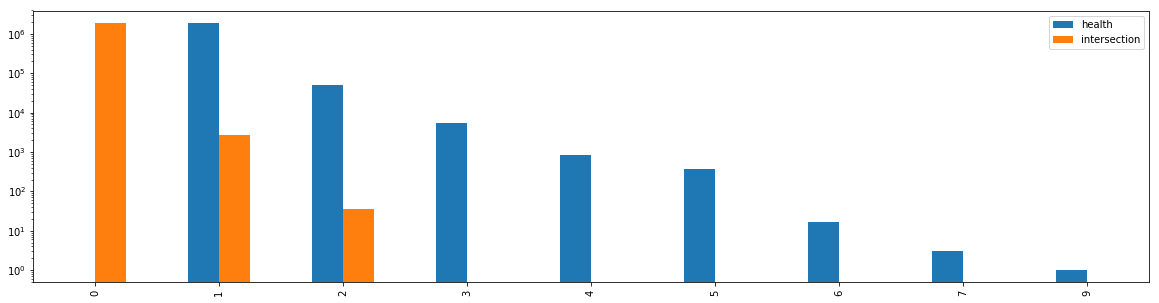

In [24]:
df_histogram_number_of_mentions = pd.DataFrame(data=histogram_number_of_mentions)
df_histogram_number_of_mentions.plot.bar(logy=True, figsize=(20,5))

### Network graphs of word/hashtag co-occurrence on intersection tweets

Blue nodes are health keywords, green nodes are climate keywords and red nodes are hashtags.
The closer the nodes are to each other, the more often the words co-occur.

#### Network graph of co-occurrence of health and climate keywords

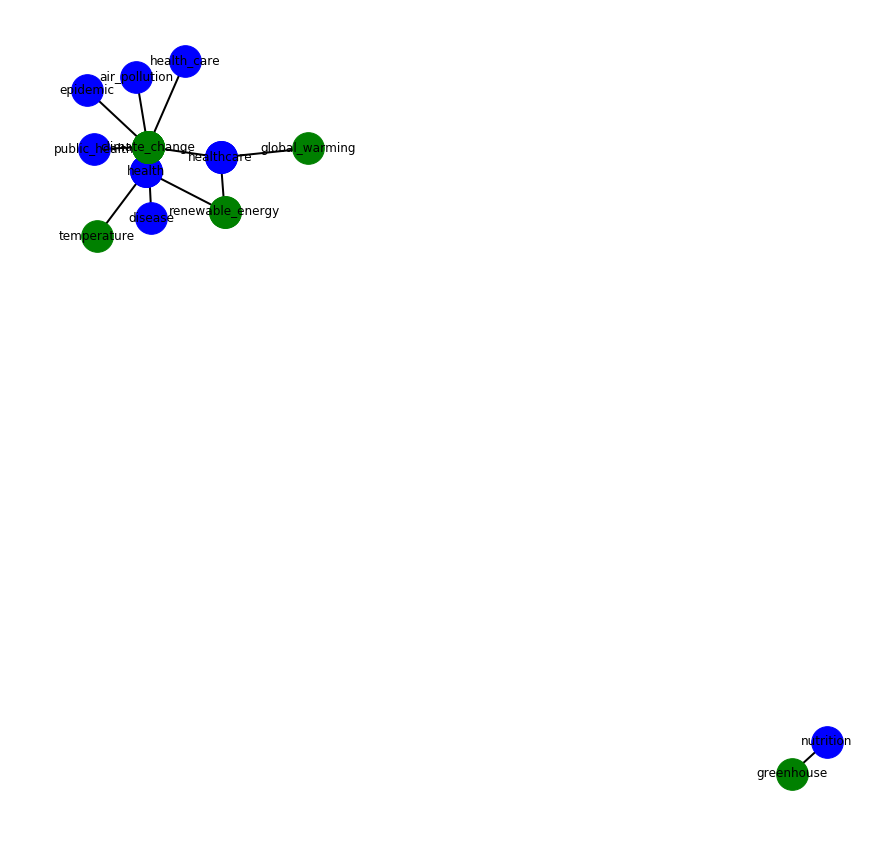

In [25]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


G = nx.Graph()

health_nodes = []
climate_nodes = []

for word1 in cooccurrence_matrix.keys():
    for word2 in cooccurrence_matrix[word1].keys():
        if cooccurrence_matrix[word1][word2] > language_ref[language]['min_coocurrence']:
            G.add_edge(word1, word2, weight=cooccurrence_matrix[word1][word2])
            health_nodes.append(word1)
            climate_nodes.append(word2)

plt.figure(figsize=(15,15))

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=health_nodes, node_size=1000, node_color='b')
nx.draw_networkx_nodes(G, pos, nodelist=climate_nodes, node_size=1000, node_color='g')
nx.draw_networkx_edges(G, pos, edgelist=G.edges(data=True), width=2)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

plt.axis('off')
plt.show()

#### Network graph of co-occurrence of keywords (health or climate) and general hashtags
Only occurrences in intersection tweets are considered

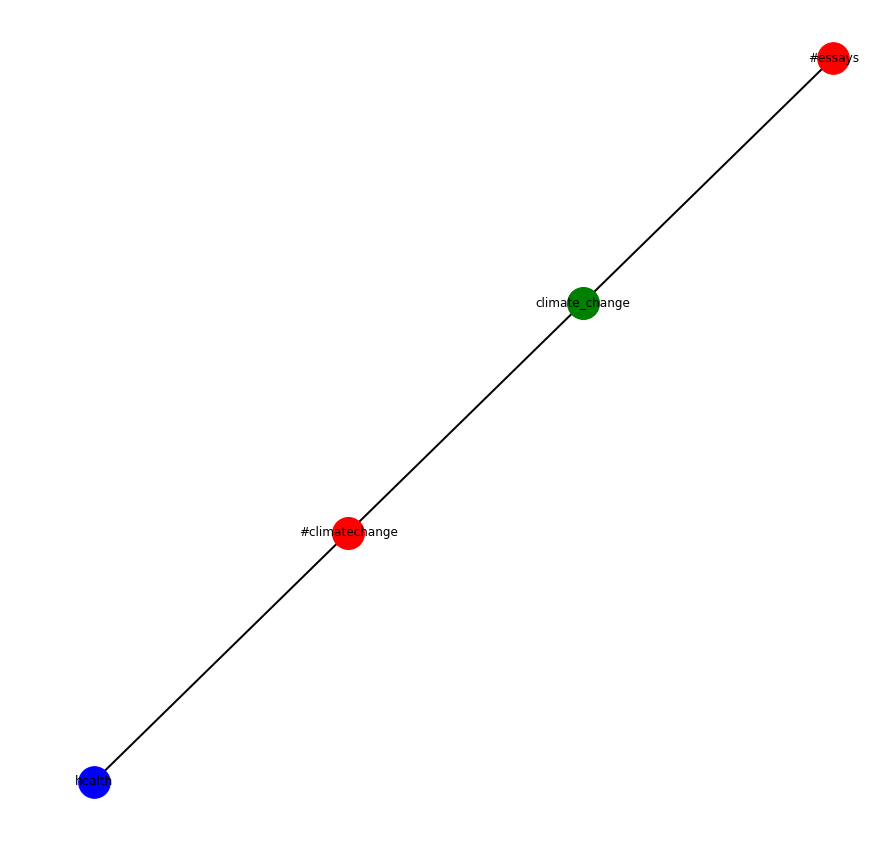

In [26]:
G = nx.Graph()

health_nodes = []
climate_nodes = []
hashtag_nodes = []

for word in mixed_cooccurrence_matrix.keys():
    for hashtag in mixed_cooccurrence_matrix[word].keys():
        if mixed_cooccurrence_matrix[word][hashtag] > language_ref[language]['min_coocurrence']:
            G.add_edge(word, hashtag, weight=mixed_cooccurrence_matrix[word][hashtag])
            hashtag_nodes.append(hashtag)
            if word in health_dict:
                health_nodes.append(word)
            if word in climate_dict:
                climate_nodes.append(word)

plt.figure(figsize=(15,15))

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=health_nodes, node_size=1000, node_color='b')
nx.draw_networkx_nodes(G, pos, nodelist=climate_nodes, node_size=1000, node_color='g')
nx.draw_networkx_nodes(G, pos, nodelist=hashtag_nodes, node_size=1000, node_color='r')
nx.draw_networkx_edges(G, pos, edgelist=G.edges(data=True), width=2)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
#edge_labels = nx.get_edge_attributes(G,'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

#### Network graph of co-occurrence of hashtags
Only occurrences in intersection tweets are considered

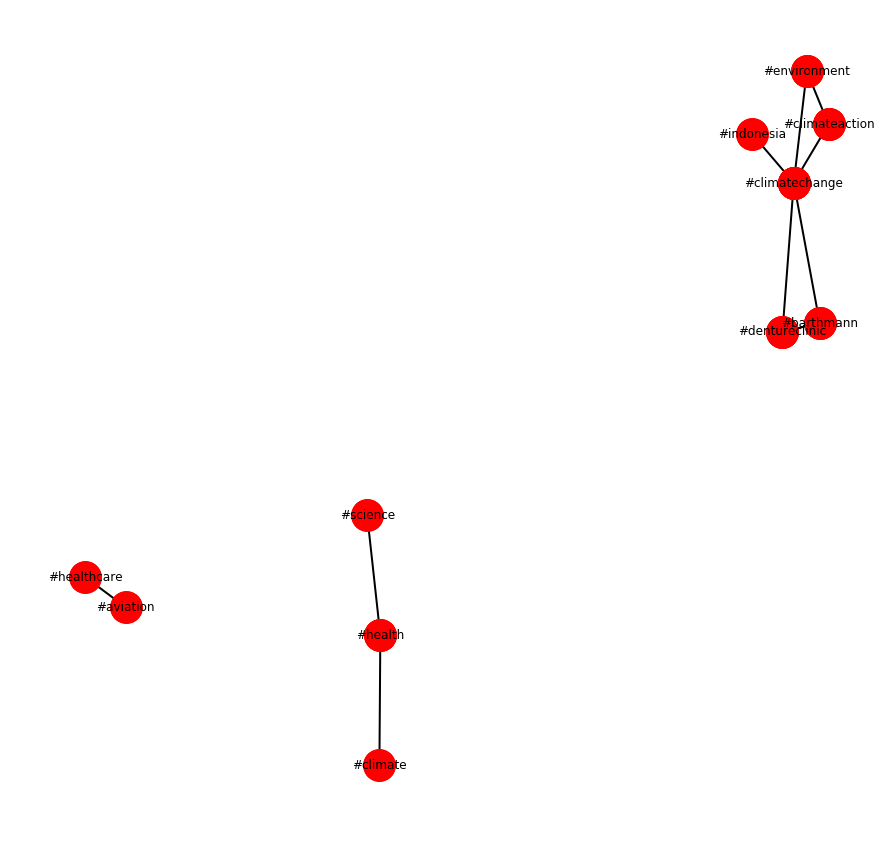

In [27]:
G = nx.Graph()

nodes = []
for htag1 in hashtags_cooccurrence_matrix.keys():
    for htag2 in hashtags_cooccurrence_matrix[htag1].keys():
        if hashtags_cooccurrence_matrix[htag1][htag2] > language_ref[language]['min_coocurrence_hashtags']:
            G.add_edge(htag1, htag2, weight=hashtags_cooccurrence_matrix[htag1][htag2])
            nodes.append(htag1)
            nodes.append(htag2)
        

plt.figure(figsize=(15,15))

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_size=1000)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(data=True), width=2)
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')
#edge_labels = nx.get_edge_attributes(G,'weight')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

### Sentiment of tweets including relevant references per year: total

In [28]:
df_per_sentiment = pd.DataFrame(data=per_sentiment, index=["positive", "neutral", "negative", "objective", "subjective"])
df_per_sentiment

health  intersection
positive     670365           443
neutral      909064          2282
negative     385467           124
objective   1256310          2481
subjective   708586           368

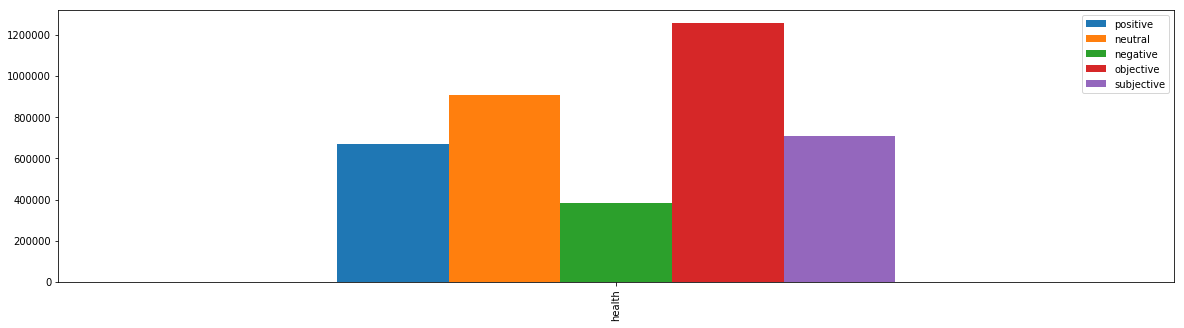

In [29]:
df_per_sentiment.T.filter(items=["health"],axis=0).plot.bar(figsize=(20,5))

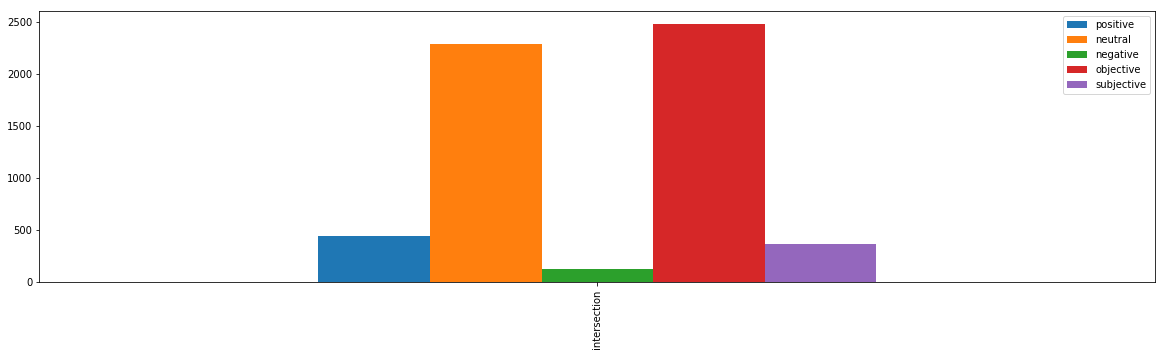

In [30]:
df_per_sentiment.T.filter(items=["intersection"],axis=0).plot.bar(figsize=(20,5))

### References per date: total, average, proportion

In [31]:
df_per_date = pd.DataFrame(data=per_date)
df_per_date

health  intersection
5 2018   160155           240
6 2018  1804741          2609

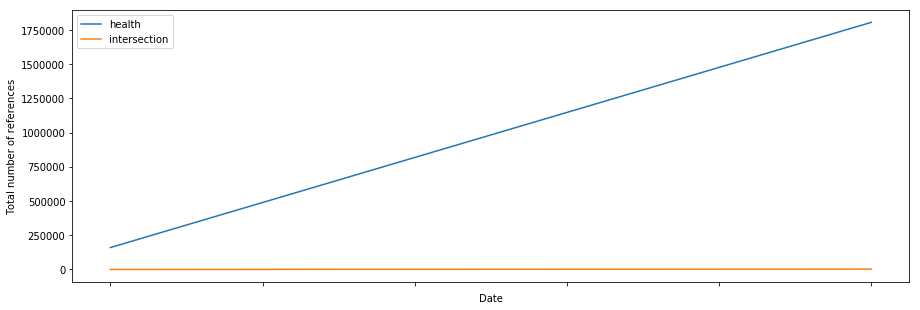

In [32]:
ax = df_per_date.plot.line(figsize=(15,5))
ax.set_xlabel("Date")
ax.set_ylabel("Total number of references")
ax

In [33]:
df_average_per_date = pd.DataFrame(data=average_per_date)
df_average_per_date

health  intersection
5 2018  1.029631      0.001543
6 2018  1.035346      0.001497

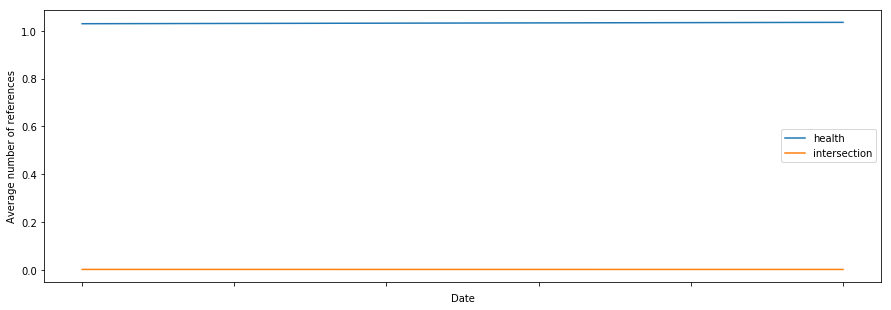

In [34]:
ax = df_average_per_date.plot.line(figsize=(15,5))
ax.set_xlabel("Date")
ax.set_ylabel("Average number of references")
ax

In [35]:
df_proportion_per_date = pd.DataFrame(data=proportion_per_date)
df_proportion_per_date

health  intersection
5 2018   100.0      0.150438
6 2018   100.0      0.147952

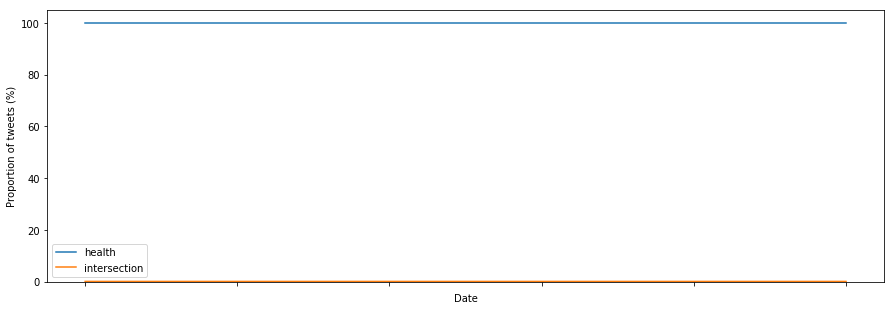

In [36]:
ax = df_proportion_per_date.plot.line(figsize=(15,5))
ax.set_xlabel("Date")
ax.set_ylabel("Proportion of tweets (%)")
ax.set_ylim(ymin=0)
ax

### References per location: total, average, proportion

Due to the vast number of different locations defined by Twitter users, the tables show only locations for which there are references to health keywords, while the plots show only locations for which there are references to both health and climate keywords (intersection)

In [37]:
df_per_location = pd.DataFrame(data=per_location)
df_per_location.sort_values(by=['intersection'], ascending=False).head(100)

health  intersection
not_specified                527554           835
United States                 32919            62
USA                            9905            35
Washington, DC                 9263            30
Global                         3292            20
Florida, USA                   7987            19
Boston, MA                     5071            19
California, USA               11692            17
New York, USA                  5414            16
Canada                         7976            15
Texas, USA                     7253            15
Los Angeles, CA                8995            15
San Diego, CA                  3116            14
Australia                      4122            13
Seattle, WA                    3954            13
Palo Alto, CA                   459            12
Colorado, USA                  1934            12
New York, NY                   9011            11
Earth                          3675            11
Chicago, IL                    7438            11
India                          5639            10
Virginia, USA                  2785             9
United Kingdom                 7351             9
Hyderabad, India               1054             8
New York                       4156             8
Pennsylvania, USA              3489             8
Los Angeles                    2856             8
Ohio, USA                      3168             8
Dallas, TX                     3193             7
Cambridge, MA                   608             6
...                             ...           ...
Philadelphia, PA               3655             3
Brasil                          469             3
Austin, Texas                   597             3
Maine                           444             3
Maine, USA                      663             3
Nederland                       213             3
Albuquerque, NM                 773             3
Pennsylvania                    733             3
Maryland, USA                  2610             3
Massachusetts                   935             3
Houston, TX                    5734             3
Las Vegas, NV                  2490             3
Baltimore, 地球, Cape Breton      178             3
Hong Kong                       443             3
UK                             5252             3
Nevada, USA                     563             3
Michigan, USA                  3223             3
Dhaka, Bangladesh               326             3
Africa                          678             3
New York, New York              591             3
Rhode Island                    211             3
New Jersey                     1430             3
Mississippi, USA                565             3
Wisconsin, USA                 1594             3
NY                              953             3
World                           513             3
Southern California             990             3
Worldwide                      3115             3
Ontario, Canada                2652             3
Fort Lauderdale, Florida        231             3

[100 rows x 2 columns]

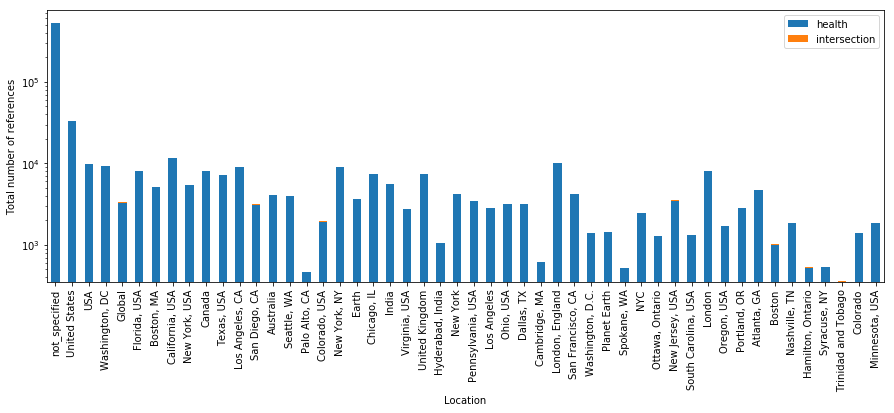

In [38]:
ax = df_per_location.sort_values(by=['intersection'], ascending=False).head(50).plot.bar(stacked=True,figsize=(15,5), logy=True)
ax.set_xlabel("Location")
ax.set_ylabel("Total number of references")
ax

In [39]:
df_average_per_location = pd.DataFrame(data=average_per_location)
df_average_per_location.sort_values(by=['intersection'], ascending=False).head(100)

health  intersection
New Bern, NC                         1.000000      0.083333
Chorley Lancashire UK                1.038462      0.076923
Seattle area                         1.000000      0.064516
Republic of Mauritius                1.062500      0.062500
Currently living on a dying planet.  1.000000      0.058824
Mesa, AZ. via Chicago,IL.            1.050000      0.050000
Bergen, Norway                       1.000000      0.050000
Miami, FL, USA                       1.000000      0.050000
Port Hueneme, CA                     1.000000      0.050000
Mohnton, PA                          1.050000      0.050000
Seal Beach, CA                       1.000000      0.050000
🧠Not Facebook🧠                       1.050000      0.050000
Bonn, Germany                        1.000000      0.048387
Katy,Texas,USA                       1.000000      0.047619
Los Angeles,CA                       1.000000      0.047619
 Canada                              1.000000      0.047619
The Collective Cosmos                1.047619      0.047619
St Louis                             1.000000      0.047619
Of Thoughts                          1.000000      0.047619
Hemet, CA                            1.000000      0.045455
Middletown, NY                       1.000000      0.045455
Dumfries, Scotland                   1.000000      0.045455
Friendswood, TX                      1.000000      0.045455
Bellflower, CA                       1.090909      0.045455
Grecia, Costa Rica                   1.000000      0.045455
Beautiful Finger Lakes               1.000000      0.045455
Burlington, Vermont                  1.043478      0.043478
Caught between the moon & NYC        1.086957      0.043478
Amman, Hashemite Kingdom of Jordan   1.130435      0.043478
Columbus, IN                         1.000000      0.043478
...                                       ...           ...
Bloomington, Indiana                 1.000000      0.033333
Minnesota                            1.000000      0.033333
Providence, Rhode Island             1.033333      0.033333
Chevy Chase, MD                      1.033333      0.033333
Roma                                 1.066667      0.033333
Third Rock from Sol                  1.033333      0.033333
From screen to Boardroom             1.066667      0.033333
San Jose                             1.016393      0.032787
Haiti                                1.016129      0.032258
Ames, Iowa                           1.000000      0.032258
Amherst, NY                          1.032258      0.032258
somewhere peaceful                   1.000000      0.032258
Grapevine, TX                        1.000000      0.032258
Manila, PH                           1.000000      0.032258
At Home                              1.000000      0.032258
Western Massachusetts                1.000000      0.032258
Richmond, London                     1.064516      0.032258
SW FL                                1.000000      0.032258
Athens                               1.032258      0.032258
Montevideo, Uruguay                  1.064516      0.032258
Exeter                               1.031746      0.031746
Vancouver, B.C.                      1.000000      0.031250
St. John's, NL                       1.078125      0.031250
Park City, UT                        1.031250      0.031250
Annandale, VA                        1.031250      0.031250
Thorofare, NJ                        1.000000      0.031250
Huntley, IL                          1.125000      0.031250
Portland, Or                         1.031250      0.031250
Canton, Ohio                         1.031250      0.031250
Northern VA.                         1.030769      0.030769

[100 rows x 2 columns]

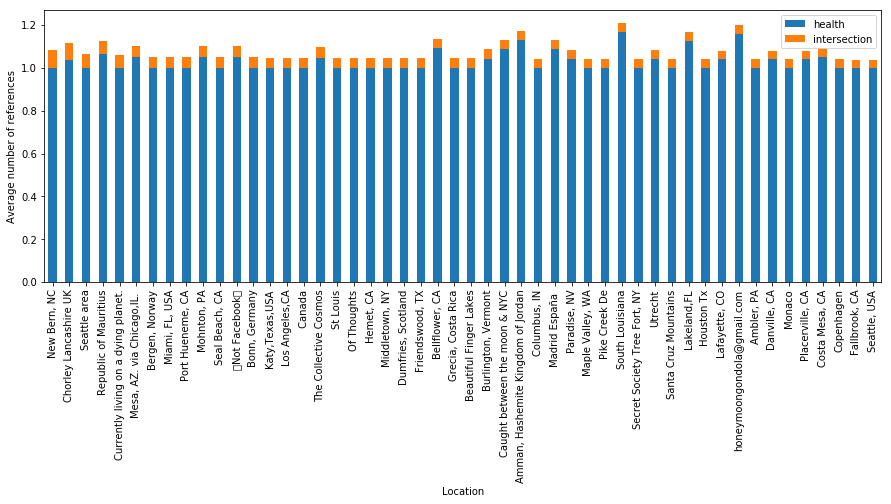

In [40]:
ax = df_average_per_location.sort_values(by=['intersection'], ascending=False).head(50).plot.bar(stacked=True,figsize=(15,5))
ax.set_xlabel("Location")
ax.set_ylabel("Average number of references")
ax

In [41]:
df_proportion_per_location = pd.DataFrame(data=proportion_per_location)
df_proportion_per_location.sort_values(by=['intersection'], ascending=False).head(100)

health  intersection
Chorley Lancashire UK                 100.0      7.692308
Seattle area                          100.0      6.451613
Republic of Mauritius                 100.0      6.250000
Currently living on a dying planet.   100.0      5.882353
🧠Not Facebook🧠                        100.0      5.000000
Mesa, AZ. via Chicago,IL.             100.0      5.000000
Bergen, Norway                        100.0      5.000000
Miami, FL, USA                        100.0      5.000000
Port Hueneme, CA                      100.0      5.000000
Seal Beach, CA                        100.0      5.000000
Mohnton, PA                           100.0      5.000000
Bonn, Germany                         100.0      4.838710
Katy,Texas,USA                        100.0      4.761905
The Collective Cosmos                 100.0      4.761905
 Canada                               100.0      4.761905
Los Angeles,CA                        100.0      4.761905
St Louis                              100.0      4.761905
Of Thoughts                           100.0      4.761905
Grecia, Costa Rica                    100.0      4.545455
Hemet, CA                             100.0      4.545455
Middletown, NY                        100.0      4.545455
Beautiful Finger Lakes                100.0      4.545455
Bellflower, CA                        100.0      4.545455
Dumfries, Scotland                    100.0      4.545455
Friendswood, TX                       100.0      4.545455
Columbus, IN                          100.0      4.347826
Amman, Hashemite Kingdom of Jordan    100.0      4.347826
Burlington, Vermont                   100.0      4.347826
Caught between the moon & NYC         100.0      4.347826
Madrid España                         100.0      4.347826
...                                     ...           ...
Bloomington, Indiana                  100.0      3.333333
Providence, Rhode Island              100.0      3.333333
Minnesota                             100.0      3.333333
From screen to Boardroom              100.0      3.333333
Chevy Chase, MD                       100.0      3.333333
Roma                                  100.0      3.333333
Third Rock from Sol                   100.0      3.333333
San Jose                              100.0      3.278689
somewhere peaceful                    100.0      3.225806
Grapevine, TX                         100.0      3.225806
Manila, PH                            100.0      3.225806
Western Massachusetts                 100.0      3.225806
SW FL                                 100.0      3.225806
Ames, Iowa                            100.0      3.225806
Montevideo, Uruguay                   100.0      3.225806
Richmond, London                      100.0      3.225806
At Home                               100.0      3.225806
Haiti                                 100.0      3.225806
Amherst, NY                           100.0      3.225806
Athens                                100.0      3.225806
Thorofare, NJ                         100.0      3.125000
Canton, Ohio                          100.0      3.125000
Huntley, IL                           100.0      3.125000
Annandale, VA                         100.0      3.125000
Park City, UT                         100.0      3.125000
St. John's, NL                        100.0      3.125000
Portland, Or                          100.0      3.125000
Vancouver, B.C.                       100.0      3.125000
Northern VA.                          100.0      3.076923
Yorkshire                             100.0      3.030303

[100 rows x 2 columns]

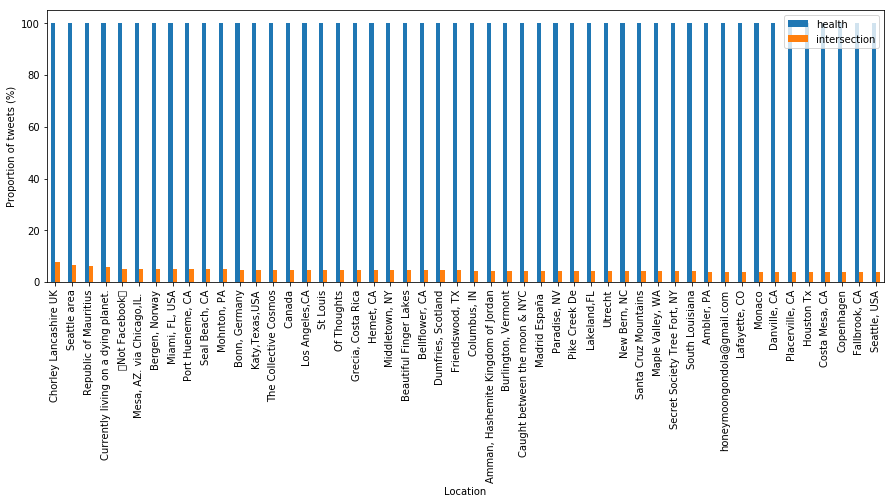

In [42]:
ax = df_proportion_per_location.sort_values(by=['intersection'], ascending=False).head(50).plot.bar(figsize=(15,5))
ax.set_xlabel("Location")
ax.set_ylabel("Proportion of tweets (%)")
ax

### References per sender (Twitter username): total and proportion

In [43]:
df_per_user = pd.DataFrame(data=per_user)
df_per_user.sort_values(by=['intersection'], ascending=False).head(50)

health  intersection
@startupcrunch        71            11
@ukbest_essays       121             7
@GCCThinkActTank       7             6
@kbvmama3              9             5
@docsforclimate        7             5
@sdapcd               40             5
@Climate_ch           50             5
@rwclimate             6             4
@SafetyPinDaily       38             4
@HurshalNewZ           3             4
@mwt2008              54             4
@MoistureVapor8r      10             3
@monitor_PH          203             3
@GloriaLaw5           64             3
@GuiltFreeTips        35             3
@allentien           178             3
@JenniferB_RN        196             3
@ENVIR_HEALTH         71             3
@HarvardCCHANGE        5             3
@ATLAS_climate         4             3
@LeahAnakin           17             2
@KenPledger            2             2
@DawnRoseTurner       70             2
@heerx42               1             2
@39Arny69              2             2
@IndivisibleOH8        2             2
@WorldfNature         60             2
@HarvardChanSPH       18             2
@worldforworld         5             2
@elliemail             2             2
@GordyMitchell        16             2
@kat_victorious        2             2
@Healthworks22        61             2
@ASMicrobiology       13             2
@CelloMomOnCars        2             2
@katelovesneuro       67             2
@EspeOppenheimer      31             2
@moonbeam655          22             2
@EcoInternet3         68             2
@Maryc1850Sadler      25             2
@KonradGawrys          1             2
@catalyst4fitnes     347             2
@laprofe63            19             2
@jimmyjhoffa          12             2
@Yombe                16             2
@jaw792                7             2
@cogwbur               8             2
@brimcmike             6             2
@NathanHRubin          7             2
@IseeSnrn              2             2

In [44]:
df_proportion_per_user = pd.DataFrame(data=proportion_per_user)
df_proportion_per_user.sort_values(by=['intersection'], ascending=False).head(50)

health  intersection
@startupcrunch    0.003359        0.3861
@GCCThinkActTank  0.000356        0.2106
@kbvmama3         0.000458        0.1755
@sdapcd           0.002036        0.1755
@Climate_ch       0.002392        0.1755
@docsforclimate   0.000356        0.1755
@mwt2008          0.002646        0.1404
@SafetyPinDaily   0.001832        0.1404
@ukbest_essays    0.005293        0.1404
@rwclimate        0.000305        0.1404
@JenniferB_RN     0.009822        0.1053
@GloriaLaw5       0.003206        0.1053
@ATLAS_climate    0.000204        0.1053
@monitor_PH       0.010026        0.1053
@HarvardCCHANGE   0.000254        0.1053
@MoistureVapor8r  0.000458        0.1053
@allentien        0.008041        0.1053
@GuiltFreeTips    0.001527        0.1053
@ENVIR_HEALTH     0.003613        0.1053
@NaturesPath      0.000102        0.0702
@archimed115      0.000305        0.0702
@Mary_Boote       0.000102        0.0702
@EWestaway        0.002341        0.0702
@sspsjustice      0.000254        0.0702
@stardustnf       0.000407        0.0702
@green_conc       0.000713        0.0702
@Harvard          0.000305        0.0702
@DouglasNewsday   0.000102        0.0702
@HarvardChanSPH   0.000865        0.0702
@grist            0.000102        0.0702
@MaKuoHua         0.000458        0.0702
@Healthworks22    0.002901        0.0702
@annemariayritys  0.000560        0.0702
@EcoExpert1       0.000305        0.0702
@lubydubydoo      0.001171        0.0702
@DrZouaghi        0.001272        0.0702
@Hurshal          0.000254        0.0702
@HurshalNewZ      0.000153        0.0702
@ajgarcia88       0.000102        0.0702
@tlgphoto1        0.000204        0.0702
@tobbyloba90      0.000458        0.0702
@SustDev          0.000102        0.0702
@LeahAnakin       0.000865        0.0702
@AngelicScot1963  0.000916        0.0702
@laprofe63        0.000967        0.0702
@Yombe            0.000713        0.0702
@Maryc1850Sadler  0.001221        0.0702
@GordyMitchell    0.000763        0.0702
@NathanHRubin     0.000356        0.0702
@EspeOppenheimer  0.001527        0.0702

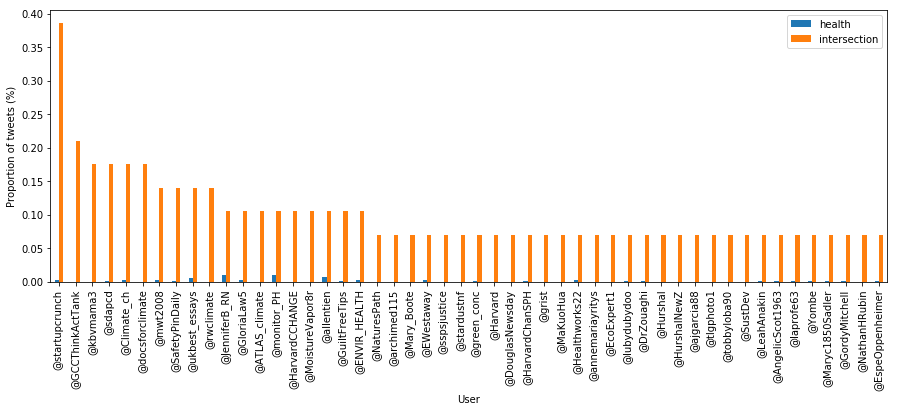

In [45]:
ax = df_proportion_per_user.sort_values(by=['intersection'], ascending=False).head(50).plot.bar(figsize=(15,5))
ax.set_xlabel("User")
ax.set_ylabel("Proportion of tweets (%)")
ax

### Frenquency of keywords: health and climate

In [46]:
df_health_keywords = pd.DataFrame(sorted(global_count_health_keywords.items(), key=lambda k: k[1], reverse=True), columns=["Keyword", "Number of mentions"])
df_health_keywords

Keyword  Number of mentions
0                     health              601560
1                 healthcare              123356
2                    illness              117019
3                health_care               88104
4                    disease               75773
5                       sars               70744
6                   epidemic               26895
7                  nutrition               17673
8                   stunting               14854
9                  infection               14056
10             public_health               13024
11                 mortality                6648
12                infectious                4642
13                   malaria                4614
14             air_pollution                4393
15           mental_disorder                4036
16              malnutrition                2881
17                   measles                2828
18                 pneumonia                1800
19                  pandemic                1670
20                 diarrhoea                 682
21              epidemiology                 546
22                 morbidity                 345
23      communicable_disease                  69
24  non-communicable_disease                  41
25   noncommunicable_disease                  16

In [47]:
df_climate_keywords = pd.DataFrame(sorted(global_count_climate_keywords.items(), key=lambda k: k[1], reverse=True), columns=["Keyword", "Number of mentions"])
df_climate_keywords

Keyword  Number of mentions
0               climate_change                2430
1                  temperature                 148
2               global_warming                  92
3                   greenhouse                  79
4             renewable_energy                  73
5              extreme_weather                  17
6                   low_carbon                   6
7            climate_pollutant                   2
8  global_environmental_change                   1
9                  green_house                   1

### Word clouds: health, climate, intersection

Up to 200 most frequent words that appear in the context of our health or climate keywords or both

In [48]:
import matplotlib.pyplot as plt
import collections
from wordcloud import WordCloud, STOPWORDS
from stop_words import get_stop_words

threshold = 200

language_specific_stopwords = get_stop_words(language)

def create_wordcloud(contexts, stopwords=[]):
    most_frequent_words = {}
    stopwords.extend(STOPWORDS)
    stopwords.extend(language_specific_stopwords)

    context_unigrams = collections.Counter(contexts)
    for word, freq in sorted(context_unigrams.items(), key=lambda k: k[1], reverse=True)[0:threshold]:
        if word not in stopwords:
            most_frequent_words[word] = freq

    wordcloud = WordCloud(background_color="white", scale=10).generate_from_frequencies(most_frequent_words)

    fig = plt.figure(1, figsize=(20, 12))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

#### Contexts for health keywords

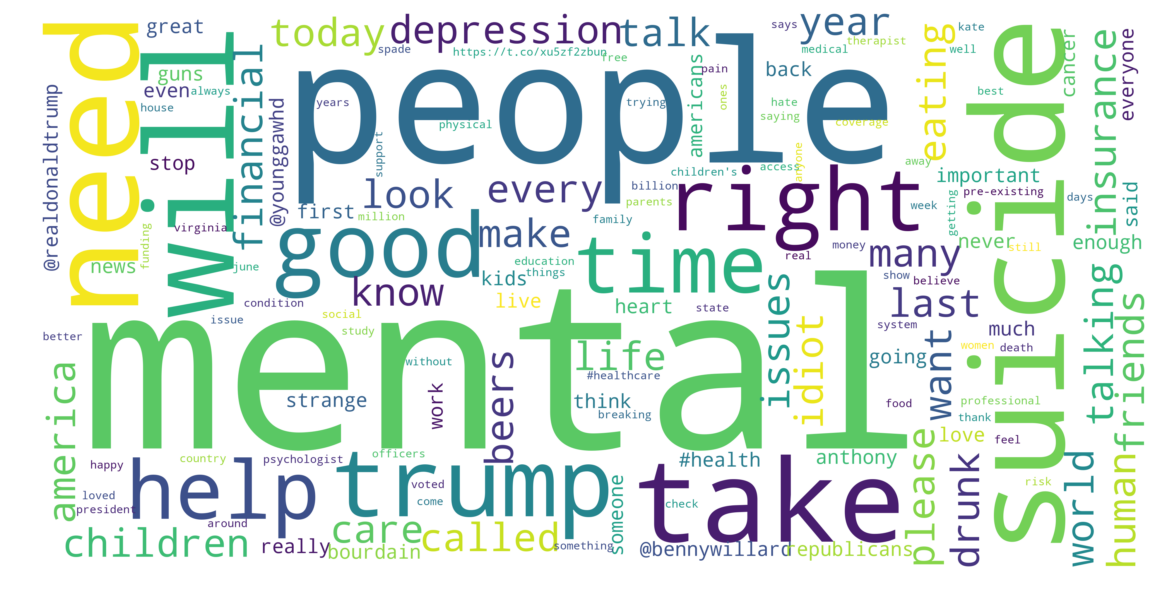

In [49]:
create_wordcloud(global_health_contexts, health_dict + ['https'])

#### Contexts for intersection tweets (excludes health and climate keywords)

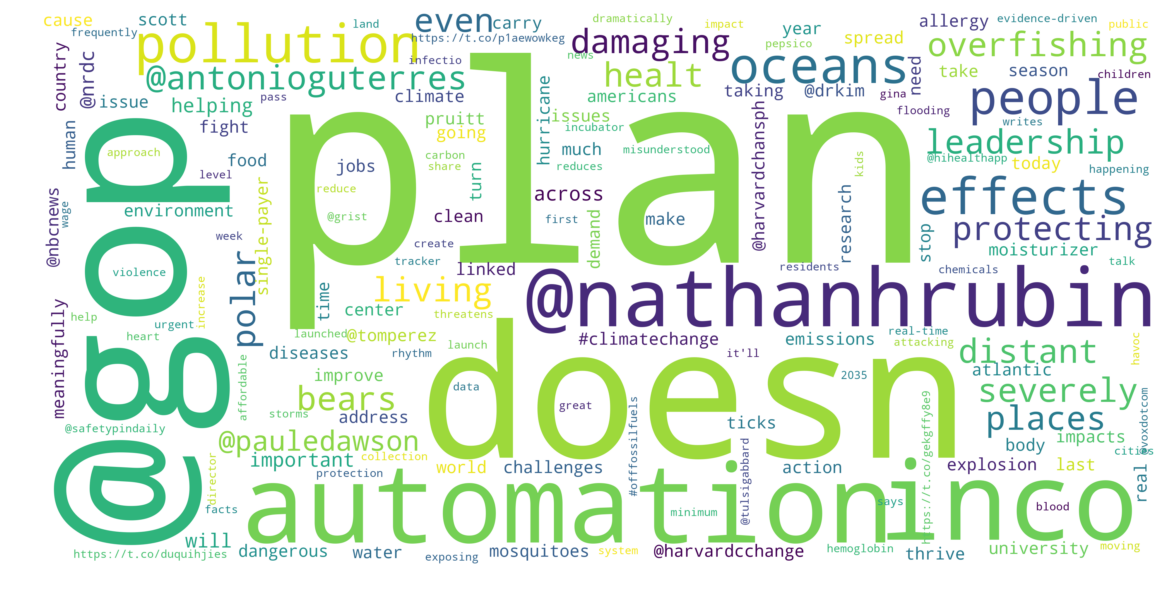

In [50]:
create_wordcloud(global_intersection_contexts, climate_dict + health_dict + ["https"])

#### Contexts for intersection tweets (includes the found health and climate keywords)

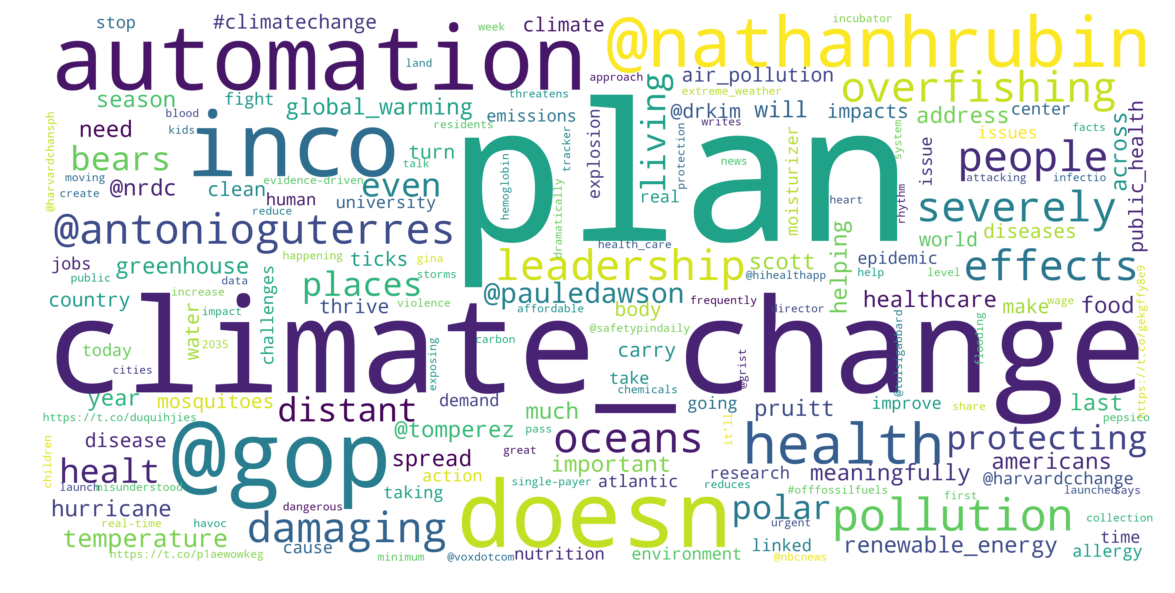

In [51]:
create_wordcloud(global_intersection_contexts, ["https"])

#### Hashtags that appear in tweets containing health keywords

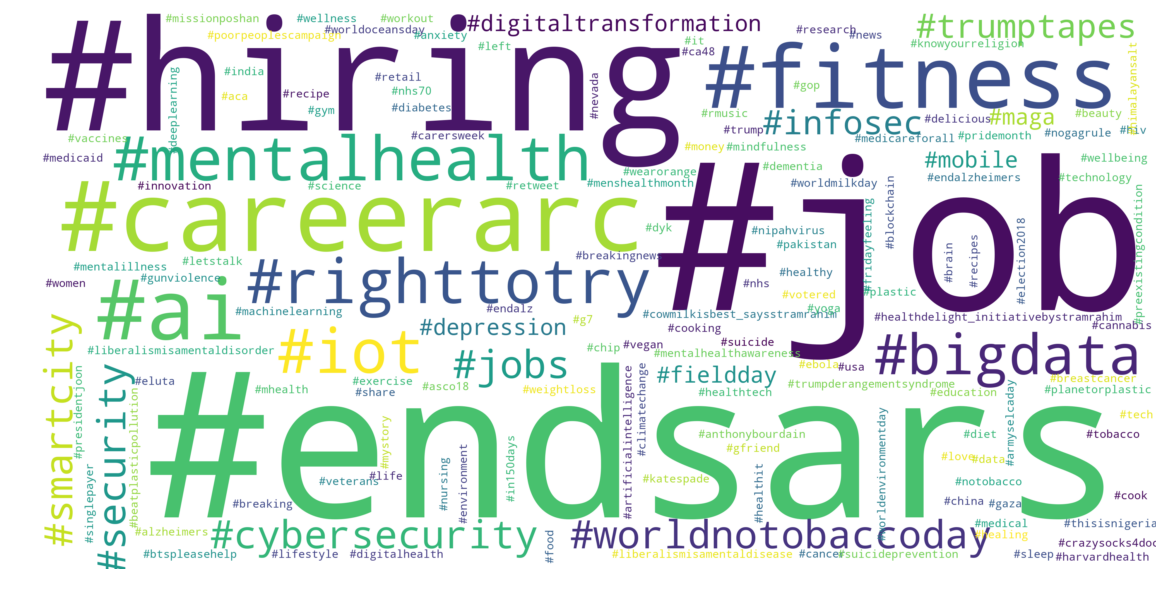

In [52]:
lowercase_hashtags = []
for hashtag in global_health_hashtag_contexts:
    lowercase_hashtags.append(hashtag.lower())
create_wordcloud(lowercase_hashtags, health_hashtag_dict + ["https"])

#### Hashtags that appear in tweets containing the intersection of health and climate keywords

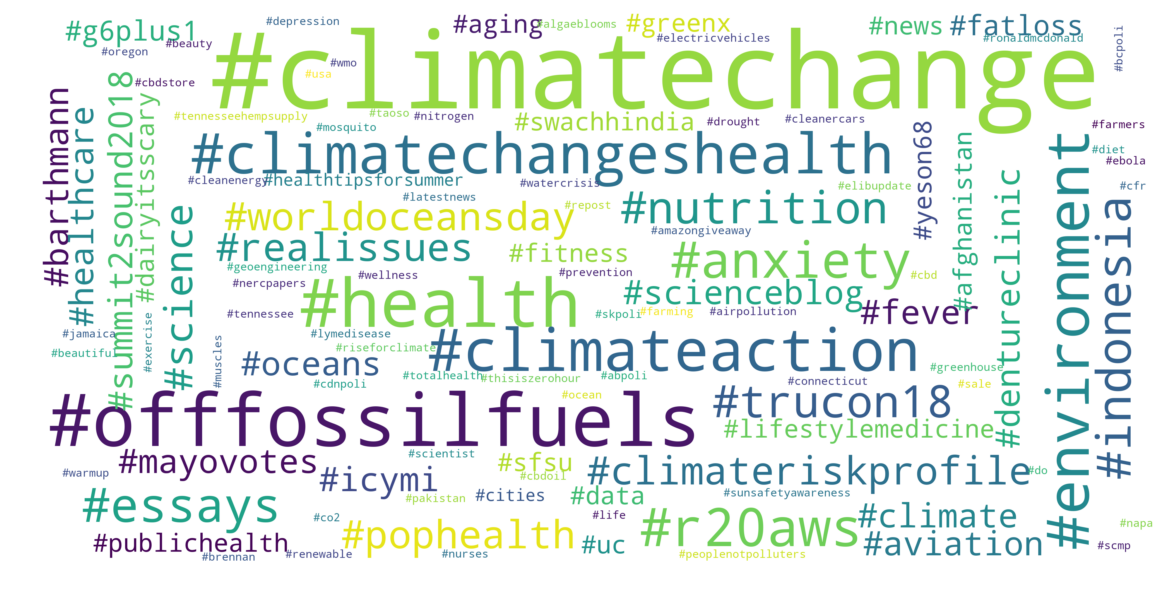

In [53]:
lowercase_hashtags = []
for hashtag in global_intersection_hashtag_contexts:
    lowercase_hashtags.append(hashtag.lower())
create_wordcloud(lowercase_hashtags, ["https"])

#### User mentions that appear in tweets containing health keywords

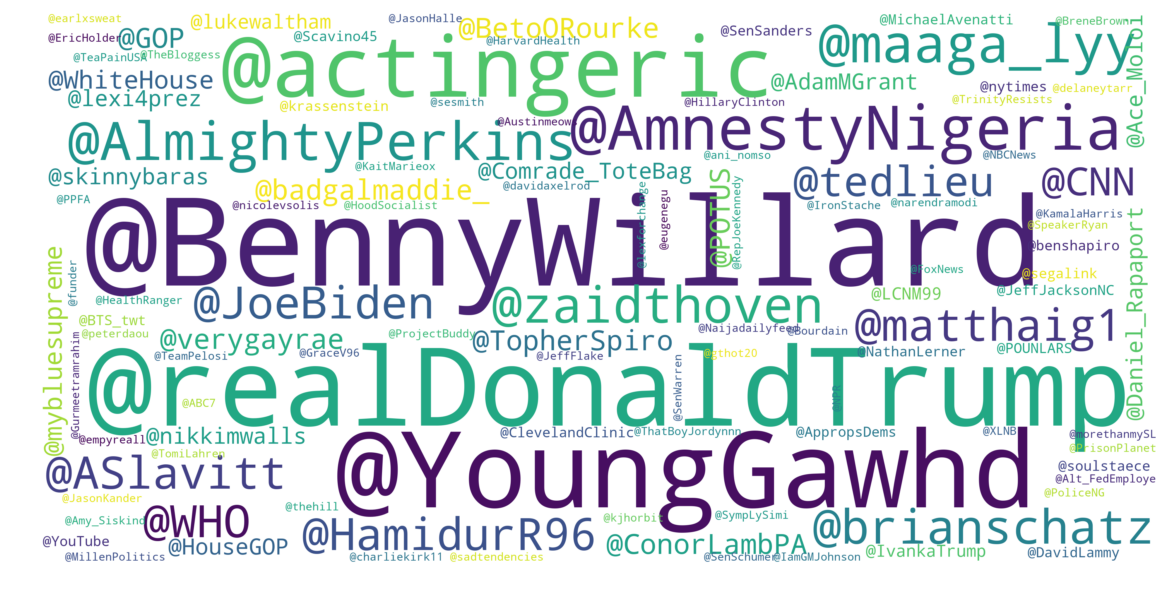

In [54]:
create_wordcloud(global_health_user_mentions_contexts)

#### User mentions that appear in tweets containing the intersection of health and climate keywords

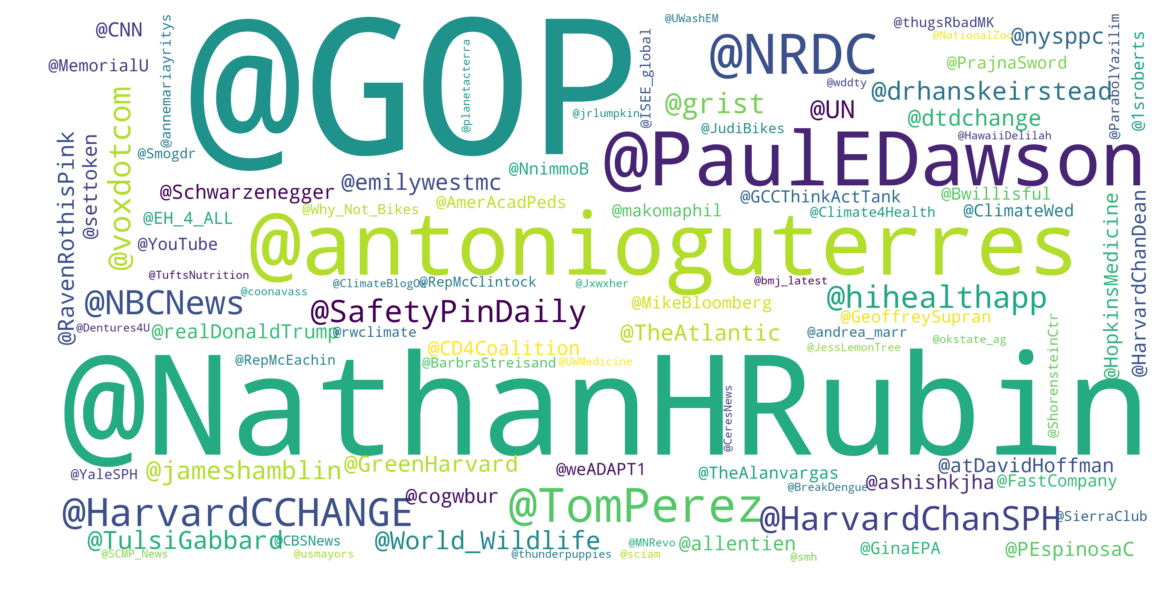

In [55]:
create_wordcloud(global_intersection_user_mentions_contexts)